## Machine Learning (CITS5508) Lab sheet 4 - Project 1
Author: Prathyusha Sangam (22357815)

### About the data

The data is obtained from UCI machine learning repository. It provides information about Cellular Localization Sites of Proteins on some E. Coli bacteria.

Attributes:
1. Sequence Name: Accession number for the SWISS-PROT database (name)
2. mcg: McGeoch's method for signal sequence recognition.
3. gvh: von Heijne's method for signal sequence recognition.
4. lip: von Heijne's Signal Peptidase II consensus sequence score. Binary attribute.
5. chg: Presence of charge on N-terminus of predicted lipoproteins. Binary attribute.
6. aac: score of discriminant analysis of the amino acid content of outer membrane and periplasmic proteins.
7. alm1: score of the ALOM membrane spanning region prediction program.
8. alm2: score of ALOM program after excluding putative cleavable signal regions from the sequence.
9. target: Localization site of protein.(non-numeric)


### Project Objective
1. To classify protein localization sites (8 target values)
2. Technique used: Decision trees


### Document Outline
* [Step 1: Set up imports and load data](#Step-1:-Set-up-imports-and-load-data)
* [Step 2: Understand the data](#Step-2:-Understand-the-data)
    * [Findings of step 2](#Findings-of-step-2:)
* [Step 3:](#)

### Step 1: Set up imports and load data

In [1]:
# allowing multiple/scrollable outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#ML
from sklearn.svm import SVC

In [2]:
# data loading

#loading .data file
ecoli_data = pd.read_csv("Datasets/ecoli.data", sep="\s+", header=None)

# adding column names
ecoli_data.columns = ["name", "mcg", "gvh", "lip","chg","aac","alm1","alm2","target"]

ecoli_data.head()

,name,mcg,gvh,lip,chg,aac,alm1,alm2,target
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


**[Back to top](#Document-Outline)**
### Step 2: Understand the data

In [3]:
# numeric attribute descriptive stats (7 attr)
ecoli_data.describe()

# Are there any null values (missing data) ?
print("null values:", ecoli_data.isnull().sum().sum())

,mcg,gvh,lip,chg,aac,alm1,alm2
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


null values: 0


cp     143
im      77
pp      52
imU     35
om      20
omL      5
imL      2
imS      2
Name: target, dtype: int64

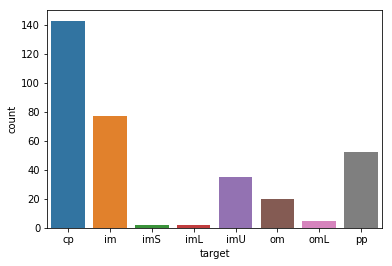

In [4]:
# Class distributions
sns.countplot('target',data= ecoli_data)
ecoli_data['target'].value_counts()

**[Back to top](#Document-Outline)**
### Findings of step 2 and relevant decisions:
1\. There are 336 rows and 9 columns including the target. The target represents one of 8 possible localization sites (categorical). The data includes 7 numeric features (columns).

2\. The feature "name" is a unique identifier of the database it originally extracted from, and hence can be dropped for our ML task due to lack of relevance. Also, being a non-numeric feature, it cannot be used in SVM without transformation.

3\. The values of numeric attributes, {mcg, gvh, lip, chg, aac, alm1, alm2}, according to data descrption are various "scores". They seem to have been normalized, and mostly lie between 0-1. The features lip, chg are binary. lip takes the values 0.48 or 1, chg takes values 0.5 or 1

4\. The class distribution of targets is uneven, with largest number of "cp" class with 143 tuples and least "imL","imS" classes with 2 tuples each. Due to this variation, it is better to perform stratified sampling for train-test splits, to make sure we don't miss some of the labels during training.

### Step 3: Stratified Train-Test Splits
Before performing the classification task, we will make Train Test splits in 80:20 ratio (industry recommended).
Since there are huge variations in number of samples of each category, we can perform stratified sampling.

#### Naming convention of the train-test splits:
* X_train: Training data frame containing features - without labels
* y_train: Data labels for training
* X_test: testing data frame containing features - without labels
* y_test: Original data labels of test data

In [5]:
#changing categorical target to numerical
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(ecoli_data['target'])
ecoli_data['target'] = le.transform(ecoli_data['target'])

ecoli_data['target'].head()

X = ecoli_data.iloc[:,1:8]
print("Shape of X , without the labels:",X.shape)
X.head()

y = ecoli_data.iloc[:,8]
print("Shape of y , the labels:",y.shape)
y.head()

LabelEncoder()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

Shape of X , without the labels: (336, 7)


,mcg,gvh,lip,chg,aac,alm1,alm2
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35


Shape of y , the labels: (336,)


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2)

print("Checking the ratio of labels in test and train splits: imL,imS are not chosen for testing")

y_train.value_counts() / len(y_train)

y_test.value_counts() / len(y_test)

Checking the ratio of labels in test and train splits: imL,imS are not chosen for testing


0    0.425373
1    0.227612
7    0.152985
4    0.104478
5    0.059701
6    0.014925
3    0.007463
2    0.007463
Name: target, dtype: float64

0    0.426471
1    0.235294
7    0.161765
4    0.102941
5    0.058824
6    0.014706
Name: target, dtype: float64

** [Back to top](#outline) **
### Step 4: Building Classifier using Support Vector machines

In [7]:
# Support Vector Machines

svc = SVC(random_state=42)
svc.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Cross Val Score - Training
cross_val_score(svc, X_train, y_train, cv=3, scoring="accuracy")

# Training 
svc_train_pred = svc.predict(X_train)
svc_train_score = svc.score(X_train, y_train)


# Testing
svc_test_pred = svc.predict(X_test)
svc_test_score = svc.score(X_test, y_test)


# Model Evaluation

svc_model = pd.DataFrame({
    'Performance Measures': ['Training Accuracy of SVC', 'Testing Accuracy of SVC'],
    'Scores': [svc_train_score,svc_test_score]})

svc_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

/Users/prathyusha/virtualenvs/p3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


array([0.6344086 , 0.69662921, 0.75581395])

,Performance Measures,Scores
0,Training Accuracy of SVC,0.750000
1,Testing Accuracy of SVC,0.794118


### Step 5: Building Classifier using decision